In [ ]:
%%capture

import matplotlib.pyplot as plt
import numpy as np
import nltk
import re

# Required by nltk.word_tokenize
nltk.download('punkt')
# Required by nltk.corpus.twitter_samples
nltk.download('twitter_samples')
# Required by nltk.corpus.stopwords
nltk.download('stopwords')

In [ ]:
#@title Auxiliar Functions for Evaluation ⚠️
#@markdown ⚡ Run This cell to load the functions that help you to validate if your tasks are correctly done or not


############    Validate equivalence    ############

def listsHaveSameValues(list1, list2):
    if type(list1) != list or type(list2) != list:
        return False
    if len(list1) != len(list2):
        return False
    for item in list1:
        if item not in list2:
            return False
    return True

def dictionariesHaveSameValues(dict1, dict2):
    if type(dict1) != dict or type(dict2) != dict:
        return False
    if len(dict1) != len(dict2):
        return False
    for key in dict1:
        if key not in dict2:
            return False
        if dict1[key] != dict2[key]:
            return False
    return True

############    Answer is Correct    ############

def answerIsCorrectList(correctAnswer, input, yourFunction):
  import types
  if not isinstance(yourFunction, types.FunctionType):
    return False
  yourAnswer = yourFunction(input)
  return listsHaveSameValues(correctAnswer, yourAnswer)

def answerIsCorrectDict(correctAnswer, input, yourFunction):
  import types
  if not isinstance(yourFunction, types.FunctionType):
    return False
  yourAnswer = yourFunction(input)
  return dictionariesHaveSameValues(correctAnswer, yourAnswer)

############    Print Diffs    ############

def printDifferences(correctAnswer, yourAnswer, input):
      print(f'Input:\t\t{input}')
      print(f'Correct Answer:\t{correctAnswer}')
      print(f'Your Answer: \t{yourAnswer}')
      print()
  

def printDifferencesBetweenDicts(correctDict, yourDict, input=None):
    keysOnlyInCorrect = []
    keysOnlyInYours = []
    keysWithDifferentValues = []

    allKeys = []
    allKeys.extend(list(correctDict))
    allKeys.extend(list(yourDict))
    allKeys = set(allKeys)

    for key in allKeys:
      if (key in correctDict) and (key not in yourDict):
        keysOnlyInCorrect.append(key)
      elif (key in yourDict) and (key not in correctDict):
        keysOnlyInYours.append(key)
      elif correctDict[key] != yourDict[key]:
        keysWithDifferentValues.append(key)
    if (input != None):
      print(f'Input:\n{input}\n')
    print(f'Keys that you are missing:\n{keysOnlyInCorrect}\n')
    print(f'Keys that should not be in your answer:\n{keysOnlyInYours}\n')
    print(f'Keys with wrong values:\n{keysWithDifferentValues}')

############    Test Answer    ############

def testAnswers(yourImplementation, answersAndInputs, answerType):
  if answerType == 'list':
    answerIsCorrect = answerIsCorrectList
    printDiffs = printDifferences
  elif answerType == 'dict':
    answerIsCorrect = answerIsCorrectDict
    printDiffs = printDifferencesBetweenDicts
  else:
    raise Exception(f'Answer Type is not recognized: {answerType}')
  import types
  if not isinstance(yourImplementation, types.FunctionType):
    raise Exception('Your implementation is not a function')
  nTests = len(answersAndInputs)
  for i in range(nTests):
    correctAnswer, input = answersAndInputs[i]
    print(f'Test {i+1}/{nTests} ', end='')
    if answerIsCorrect(correctAnswer, input, yourFunction=yourImplementation):
      print('✅')
      print(f'Input: \t{input}')
      print(f'Answer:\t{correctAnswer}')
      print()
    else:
      yourAnswer = yourImplementation(input)
      print('❌')
      printDiffs(correctAnswer, yourAnswer, input)

############    Print    ############

def showError(message, functionName):
    print(f'Error at Function {functionName}: {message}')

print('The auxiliar functions were loaded successfully')

The auxiliar functions were loaded successfully


In [ ]:
from nltk.corpus import twitter_samples 

originalPositiveTweets = twitter_samples.strings('positive_tweets.json')
originalNegativeTweets = twitter_samples.strings('negative_tweets.json')

nPositive = len(originalPositiveTweets)
nNegative = len(originalNegativeTweets)

print(f'{nPositive} positive tweets and {nNegative} negative tweets')

5000 positive tweets and 5000 negative tweets


In [ ]:
positiveIndexThatYouChose = 2750
negativeIndexThatYouChose = 3518

positive = originalPositiveTweets[positiveIndexThatYouChose]
negative = originalNegativeTweets[negativeIndexThatYouChose]

print(f'Positive tweet : {positive}')
print(f'Negative tweet : {negative}')

Positive tweet : I have no interest in speaking to you ever again. :-)
Negative tweet : I missed half of Music Bank bc grocery shopping :( but the good thing is: I finally have hubba bubba bubble gum again &lt;3


In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False)
tokensFromTweetTokenizer = tokenizer.tokenize(negative)

from nltk.tokenize import word_tokenize
tokensFromWordTokenizer = word_tokenize(negative)

from keras.preprocessing.text import text_to_word_sequence
tokensFromKerasTokenizer = text_to_word_sequence(negative,lower=True,split=" ")


print(f'TweetTokenizer: {tokensFromTweetTokenizer}')
print(f'WordTokenizer:  {tokensFromWordTokenizer}')
print(f'KerasTokenizer: {tokensFromKerasTokenizer}')

TweetTokenizer: ['i', 'missed', 'half', 'of', 'music', 'bank', 'bc', 'grocery', 'shopping', ':(', 'but', 'the', 'good', 'thing', 'is', ':', 'i', 'finally', 'have', 'hubba', 'bubba', 'bubble', 'gum', 'again', '<3']
WordTokenizer:  ['I', 'missed', 'half', 'of', 'Music', 'Bank', 'bc', 'grocery', 'shopping', ':', '(', 'but', 'the', 'good', 'thing', 'is', ':', 'I', 'finally', 'have', 'hubba', 'bubba', 'bubble', 'gum', 'again', '&', 'lt', ';', '3']
KerasTokenizer: ['i', 'missed', 'half', 'of', 'music', 'bank', 'bc', 'grocery', 'shopping', 'but', 'the', 'good', 'thing', 'is', 'i', 'finally', 'have', 'hubba', 'bubba', 'bubble', 'gum', 'again', 'lt', '3']


In [ ]:
from nltk.corpus import stopwords
stopWords = nltk.corpus.stopwords.words('english')

myself is a stop word


In [ ]:
import string

punctuation = string.punctuation

, is a punctuation character


In [ ]:
def cleanTokens(listOfTokens):
  cleanedTokens = []
  
  for token in listOfTokens:
    true_or_false = []
    list_of_reg = ['\d','^@+','^https://+','[A-Za-z0-9]+@[a-z]+\.+']
    if token in stopWords or token in punctuation: pass
    else:
      token = re.sub('^#+','',token)
      for reg in list_of_reg:
        true_or_false.append(bool(re.match(reg,token)))
      if True not in true_or_false: 
        if bool(re.match('[A-Za-z]',token)) == True:
          token = token.lower()
        cleanedTokens.append(token)


  return cleanedTokens

In [ ]:
#@title Test cleanTokens() ⚠️

#@markdown ⚡ Run this cell to validate if you implemented the function correctly

def checkCleanTokens():
  answersAndInputs = [
    # Numbers
    (['animals'] , ['20','animals']),
    # Mentions @somebody
    (['awesome'] , ['@nlp','awesome']),
    # Hashtags
    (['all','one'],['#all','4','one']),
    # Letter Emojis
    (['face',':)','better',':('],['face',':)','better',':(']),
    # Char Emojis
    (['😃','😝'],['😃','😝']),
    # Punctuation
    (['apple','oranges'],['apple',',','oranges','.']),
    # StopWords
    (['apple','particular'],['but','an','apple','is','not','that','so','particular']),
    # Lower Case
    (['something','very','special',':D'],['Something','VeRy','SPECIAL',':D']),
    # Remove URLs
    (['link','contains','http','https'],['link','contains','http','https','https://developer.mozilla.org/en-US/docs/Web/HTTP',]),
    # Words with numbers should not be removed
    (['forever21','fashion','shop'],['forever21','fashion','shop']),
    # E-mail address
    (['email','address'],['abc123@abc.co','email','address']),
    # Empty Input should work too
    ([],[])
  ]
  yourImplementation = cleanTokens
  answerType = 'list'
  testAnswers(yourImplementation, answersAndInputs, answerType)

checkCleanTokens()

Test 1/12 ✅
Input: 	['20', 'animals']
Answer:	['animals']

Test 2/12 ✅
Input: 	['@nlp', 'awesome']
Answer:	['awesome']

Test 3/12 ✅
Input: 	['#all', '4', 'one']
Answer:	['all', 'one']

Test 4/12 ✅
Input: 	['face', ':)', 'better', ':(']
Answer:	['face', ':)', 'better', ':(']

Test 5/12 ✅
Input: 	['😃', '😝']
Answer:	['😃', '😝']

Test 6/12 ✅
Input: 	['apple', ',', 'oranges', '.']
Answer:	['apple', 'oranges']

Test 7/12 ✅
Input: 	['but', 'an', 'apple', 'is', 'not', 'that', 'so', 'particular']
Answer:	['apple', 'particular']

Test 8/12 ✅
Input: 	['Something', 'VeRy', 'SPECIAL', ':D']
Answer:	['something', 'very', 'special', ':D']

Test 9/12 ✅
Input: 	['link', 'contains', 'http', 'https', 'https://developer.mozilla.org/en-US/docs/Web/HTTP']
Answer:	['link', 'contains', 'http', 'https']

Test 10/12 ✅
Input: 	['forever21', 'fashion', 'shop']
Answer:	['forever21', 'fashion', 'shop']

Test 11/12 ✅
Input: 	['abc123@abc.co', 'email', 'address']
Answer:	['email', 'address']

Test 12/12 ✅
Input: 	[]
A

In [ ]:
def wordCount(listOfWords):
  wordFreqs = {}

  for word in listOfWords:
    if word in wordFreqs: wordFreqs[word] += 1
    else: wordFreqs[word] = 1

  return wordFreqs

In [ ]:
def wordCountTweets(listOfTweets):
  wordFreqs = {}
  for listOfWords in listOfTweets:
    wf = wordCount(listOfWords)
    wordFreqs = sumDictionaries(wordFreqs,wf)
  return wordFreqs

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

tokenizedPositiveTweets = [tokenizer.tokenize(tweet) for tweet in originalPositiveTweets]
tokenizedNegativeTweets = [tokenizer.tokenize(tweet) for tweet in originalNegativeTweets]

cleanedPositiveTweets = [cleanTokens(tweet) for tweet in tokenizedPositiveTweets]
cleanedNegativeTweets = [cleanTokens(tweet) for tweet in tokenizedNegativeTweets]

finalPositiveTweets = cleanedPositiveTweets
finalNegativeTweets = cleanedNegativeTweets

positiveFrequencies = wordCountTweets(finalPositiveTweets)
negativeFrequencies = wordCountTweets(finalNegativeTweets)

In [ ]:
print('Positive ->', positiveFrequencies)
print('Negative ->', negativeFrequencies)

Positive -> {'followfriday': 25, 'top': 30, 'engaged': 7, 'members': 11, 'community': 31, 'week': 71, ':)': 3691, 'hey': 77, 'james': 7, 'how': 24, 'odd': 1, ':/': 5, 'please': 96, 'call': 26, 'contact': 6, 'centre': 2, 'able': 8, 'assist': 1, 'many': 33, 'thanks': 392, 'listen': 11, 'last': 44, 'night': 63, 'as': 5, 'you': 122, 'bleed': 2, 'amazing': 49, 'track': 5, 'when': 14, 'scotland': 2, 'congrats': 21, 'yeaaaah': 1, 'yippppy': 1, 'accnt': 2, 'verified': 1, 'rqst': 1, 'succeed': 1, 'got': 68, 'blue': 9, 'tick': 1, 'mark': 1, 'fb': 6, 'profile': 2, 'days': 36, 'this': 40, 'one': 127, 'irresistible': 2, 'flipkartfashionfriday': 17, 'http://t.co/ebz0l2venm': 1, 'we': 82, 'like': 218, 'keep': 59, 'lovely': 61, 'customers': 2, 'waiting': 26, 'long': 36, 'hope': 123, 'enjoy': 61, 'happy': 197, 'friday': 112, 'lwwf': 1, 'on': 12, 'second': 9, 'thought': 27, '’': 21, 'enough': 18, 'time': 112, 'dd': 1, 'but': 35, 'new': 146, 'shorts': 1, 'entering': 1, 'system': 2, 'sheep': 1, 'must': 19

In [ ]:

words = ['cute',':-(','really',':D','...',
         '😭','follow','birthday','always','💜',
         'netflix','drinking','yes','life','omg']

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


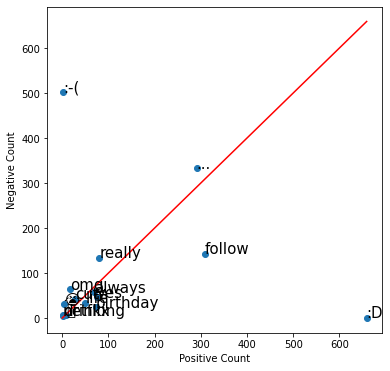

In [ ]:
#@title Word Map using Linear Scale ⚠️
#@markdown ⚡ Run this cell to visualize the level of Neutrality, positiveness or negativeness of each word

freqs = unifyFrequencies(positiveFrequencies, negativeFrequencies)
freqs = filterWords(freqs, words)
plotWords(freqs, logarithmicScale=False)

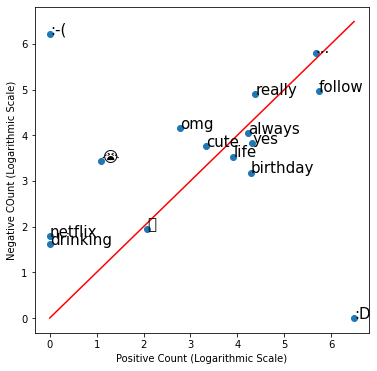

In [ ]:
#@title Word Map using Logarithmic Scale ⚠️
#@markdown ⚡ Run this cell to visualize the level of Neutrality, positiveness or negativeness of each word.

freqs = unifyFrequencies(positiveFrequencies, negativeFrequencies)
freqs = filterWords(freqs, words)
plotWords(freqs, logarithmicScale=True)

In [ ]:
def splitByUpperCase(word):
  listOfWords = []

  if word.isupper():return [word]
  else: 
    listOfWords = re.split(r"(?=[A-Z])", word)
    if '' in listOfWords: listOfWords.remove('')

  return listOfWords

In [ ]:
#@title Check  implementation
#@markdown Run this cell to test your implementation of SplitByUpperCase() against different inputs.

def checkSplitByUpperCase():
  answersAndInputs = [
    (['ABC'] , 'ABC'),
    (['Word'] , 'Word'),
    (['words'] , 'words'),
    (['words','A'], 'wordsA'),
    (['Some','Words','Here','And','There'], 'SomeWordsHereAndThere')
  ]
  yourImplementation = splitByUpperCase
  answerType = 'list'
  testAnswers(yourImplementation, answersAndInputs, answerType)

checkSplitByUpperCase()

Test 1/5 ✅
Input: 	ABC
Answer:	['ABC']

Test 2/5 ✅
Input: 	Word
Answer:	['Word']

Test 3/5 ✅
Input: 	words
Answer:	['words']

Test 4/5 ✅
Input: 	wordsA
Answer:	['words', 'A']

Test 5/5 ✅
Input: 	SomeWordsHereAndThere
Answer:	['Some', 'Words', 'Here', 'And', 'There']

